# DS54 — Sectoral Growth & Volatility Analysis

**Member Assigned:** DELOS REYES, Leo
**Task Name:** Sectoral Growth & Volatility Analysis

## Task Description
Analyze growth trends and volatility at the sector level across time. Compute growth rates and variation measures to identify which sectors grow consistently and which exhibit high instability.

## Expected Outputs
- Sector-level growth table (YoY and/or CAGR)
- Volatility measures per sector (STD, CV)
- Identification of fastest-growing and most volatile sectors
- Sector trend visualizations
- Interpretation of sector dynamics

## Dataset: SECTORAL ECONOMIC STRUCTURE (Sector Level)



In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
#Validation printing dataset 2 using existing variable
print("\nDataset 2 shape:", df2.shape)
print(df2.head())


Dataset 2 shape: (150, 4)
                          Main_Sector  Year               Price_Type  \
0  Agriculture, forestry, and fishing  2000  At Constant 2018 Prices   
1  Agriculture, forestry, and fishing  2000        At Current Prices   
2  Agriculture, forestry, and fishing  2001  At Constant 2018 Prices   
3  Agriculture, forestry, and fishing  2001        At Current Prices   
4  Agriculture, forestry, and fishing  2002  At Constant 2018 Prices   

     Total_GRDP  
0  1.045260e+09  
1  5.051345e+08  
2  1.084420e+09  
3  5.253688e+08  
4  1.125200e+09  


In [40]:
#Focus on  constant prices for real growth analysis and to avoid inflation
df2_consts = df2[df2['Price_Type'] == 'At Constant 2018 Prices'].copy()

## Compute Year-over-Year (YoY) Growth per Sector

In [41]:
df2_consts = df2_consts.sort_values(["Main_Sector", "Year"])

df2_consts["YoY_Growth"] = (df2_consts.groupby("Main_Sector")["Total_GRDP"].pct_change())
df2_consts["YoY_Growth"] = df2_consts["YoY_Growth"].fillna(0)
display(df2_consts)

,Main_Sector,Year,Price_Type,Total_GRDP,YoY_Growth
0,"Agriculture, forestry, and fishing",2000,At Constant 2018 Prices,1.045260e+09,0.000000
2,"Agriculture, forestry, and fishing",2001,At Constant 2018 Prices,1.084420e+09,0.037465
4,"Agriculture, forestry, and fishing",2002,At Constant 2018 Prices,1.125200e+09,0.037606
6,"Agriculture, forestry, and fishing",2003,At Constant 2018 Prices,1.177603e+09,0.046572
8,"Agriculture, forestry, and fishing",2004,At Constant 2018 Prices,1.236432e+09,0.049956
...,...,...,...,...,...
140,Services,2020,At Constant 2018 Prices,1.175766e+10,-0.102102
142,Services,2021,At Constant 2018 Prices,1.238936e+10,0.053727
144,Services,2022,At Constant 2018 Prices,2.701488e+10,1.180491
146,Services,2023,At Constant 2018 Prices,2.900481e+10,0.073660


## Compute CAGR per Sector

In [42]:
df2_cagr_table = []

for sector, group in df2_consts.groupby("Main_Sector"):
    group = group.sort_values("Year")

    start_val = group["Total_GRDP"].iloc[0]
    end_val = group["Total_GRDP"].iloc[-1]
    n_years = group["Year"].iloc[-1] - group["Year"].iloc[0]

    cagr = (end_val / start_val) ** (1 / n_years) - 1

    df2_cagr_table.append({
        "Main_Sector": sector,
        "CAGR": cagr
    })

cagr_df = pd.DataFrame(df2_cagr_table)
display(cagr_df)


,Main_Sector,CAGR
0,"Agriculture, forestry, and fishing",0.020343
1,Industry,0.046023
2,Services,0.058596


## Compute Volatility Measures

In [43]:
volatility_df2 = (
    df2_consts.groupby("Main_Sector")["YoY_Growth"]
    .agg(["mean", "std"])
    .reset_index()
)

volatility_df2["CV"] = volatility_df2["std"] / volatility_df2["mean"]
volatility_df2

,Main_Sector,mean,std,CV
0,"Agriculture, forestry, and fishing",0.039858,0.223548,5.608586
1,Industry,0.066609,0.247584,3.716955
2,Services,0.079290,0.255066,3.216870


## Combine Results into Final Table

In [44]:
final_table = cagr_df.merge(
    volatility_df2,
    on="Main_Sector",
    how="left"
)

final_table = final_table.sort_values("CAGR", ascending=False)
final_table

,Main_Sector,CAGR,mean,std,CV
2,Services,0.058596,0.079290,0.255066,3.216870
1,Industry,0.046023,0.066609,0.247584,3.716955
0,"Agriculture, forestry, and fishing",0.020343,0.039858,0.223548,5.608586


## Identify Key Sectors

In [45]:
final_table.sort_values("std", ascending=False)

,Main_Sector,CAGR,mean,std,CV
2,Services,0.058596,0.079290,0.255066,3.216870
1,Industry,0.046023,0.066609,0.247584,3.716955
0,"Agriculture, forestry, and fishing",0.020343,0.039858,0.223548,5.608586


In [46]:
final_table.sort_values("CAGR", ascending=False)

,Main_Sector,CAGR,mean,std,CV
2,Services,0.058596,0.079290,0.255066,3.216870
1,Industry,0.046023,0.066609,0.247584,3.716955
0,"Agriculture, forestry, and fishing",0.020343,0.039858,0.223548,5.608586


## Graphs

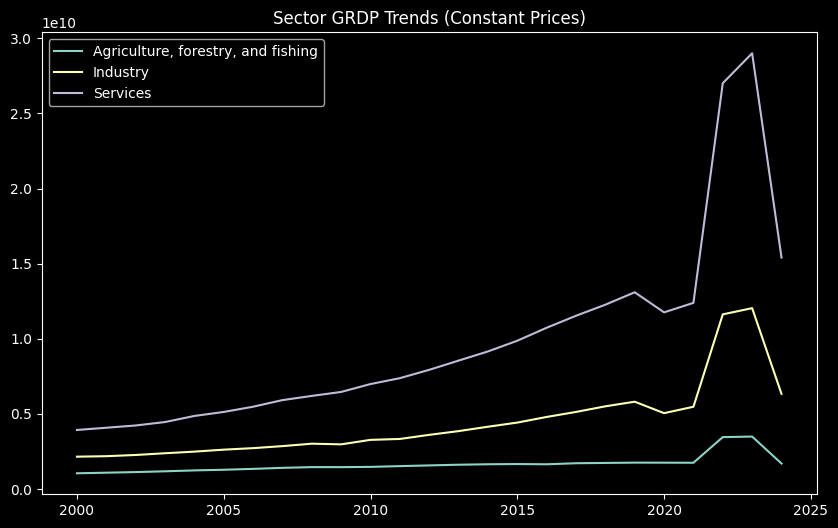

In [47]:
plt.figure(figsize=(10,6))

for sector in df2_consts["Main_Sector"].unique():
    sector_data = df2_consts[df2_consts["Main_Sector"] == sector]
    plt.plot(sector_data["Year"], sector_data["Total_GRDP"], label=sector)

plt.legend()
plt.title("Sector GRDP Trends (Constant Prices)")
plt.show()


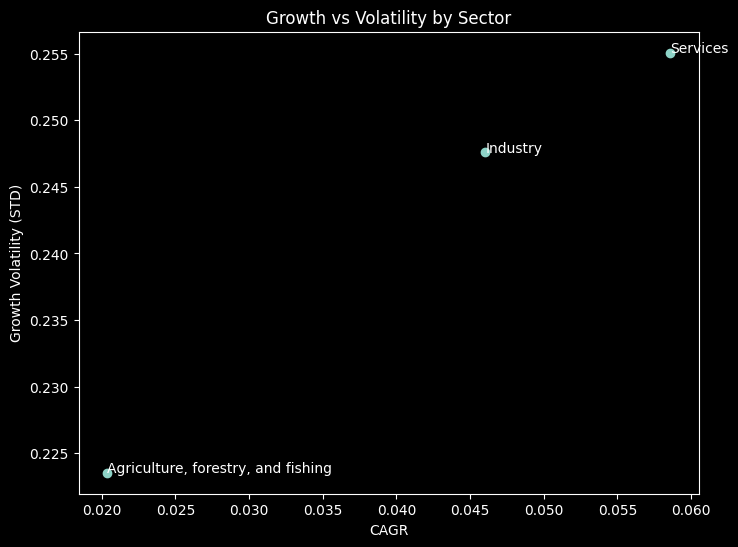

In [48]:
plt.figure(figsize=(8,6))
plt.scatter(final_table["CAGR"], final_table["std"])

plt.xlabel("CAGR")
plt.ylabel("Growth Volatility (STD)")
plt.title("Growth vs Volatility by Sector")

for i, txt in enumerate(final_table["Main_Sector"]):
    plt.annotate(txt,
                 (final_table["CAGR"].iloc[i],
                  final_table["std"].iloc[i]))

plt.show()

## Interpretation

Using only the Constant 2018 prices to reflect real growth and avoid inflation, The fastest growing sector is the Services Sector. With the Services sector having the lowest volatility, it means that it has stable growth, and changes on it stays close to the average value of it. And Agriculture Sector shows that it is the most unstable sector, offering high risk relative to  its growth.